In [161]:
import numpy as np  
import pandas as pd  # для работы с таблицами
from scipy import stats as st # При работе со статистикой

import scipy.stats as stats

import math
import matplotlib.pyplot as plt  # Библиотека для визуализации результатов 

import seaborn as sns # Более продвинутая библиотека для визуализации

### 1. Задание

<div class="alert alert-info">
<b>Задание № 0</b>

Найдите минимально необходимый объем выборки для построения интервальной оценки среднего.

- желаемая точность $\Delta$ = 3;
- дисперсия $\sigma^2$  = 225;
- уровень доверия $\beta$ = 0.95.
    
Ответ округлите до целого
</div>

In [162]:
var = 225
Sigma = math.sqrt(var)                 ### Стандартное отклонение
Z = scipy.stats.norm.ppf(0.975)        ### 95%   ### Квантиль нормального распределения. 
Delta = 3                              ### %     ### Погрешность

N = ((Sigma*Z)/Delta)**2
math.ceil(N)

97

<div class="alert alert-info">
<b>Задание № 1</b>

Постройте `98% доверительный интервал` для среднего значения, если известно, что

- объем выборки n = 25;
- среднее значение по выборке $\overline x$ = 130;
- Из достоверных источников известно стандартное отклонение $\sigma = 15$.
    
В ответ укажите длину полученного доверительного интервала (разницу между правым и левым концом), окруленную до целого
</div>

In [163]:
n = 25
Sigma = 15
confidence = 0.98

L = 2 * Sigma * scipy.stats.t.ppf((1 + confidence)/2, n)
math.ceil(L)

75

### 2. Вам даны две выборки роста мужчин и женщин. Докажите, используя t-Тест Стьдента, что различия между выборками незначительно, если уровень значимости равен 0.001

<div class="alert alert-info">
<b>Задание № 2</b>

Даны две выборки роста мужчин и женщин. 
- Докажите, используя `t-Тест Стьдента`, что различие между выборками незначительно, если уровень значимости равен $\alpha$ `= 0.001`.
- Покажите различия визуально
</div>

In [164]:
import scipy.stats as stats

population_men  = st.norm.rvs(loc=19, scale=171, size=11000000)  # Выборка мужчин со средним ростом 171
population_women = st.norm.rvs(loc=16, scale=165, size=12000)  # Выборка женщин со средним ростом 165

H0 - различия незначительны, H1 - различия значительны

In [165]:
t, p = st.ttest_ind(population_men, population_women, equal_var=False)
print(t, p)
if (result.pvalue < alpha):
    print('Отвергаем нулевую гипотезу, различия между выборками значительно')
else:
    print('Не отвергаем нулевую гипотезу')

0.8099191882836102 0.4180026465302491
Отвергаем нулевую гипотезу, различия между выборками значительно


### 3. Определите объем необходимой выборки для исследования среднего чека за кофе в случайном городе, если известно, что в этом городе стандартное отклонение = 150, уровень доверия = 95%. Погрешность 50 рублей. 

<div class="alert alert-info">
<b>Задание № 3</b>

Определите объем необходимой выборки для исследования среднего чека за кофе в случайном городе если известно, что в этом городе:

- стандартное отклонение $\sigma = 150$;
- уровень доверия $\beta$  = 95%;
- Погрешность $\Delta = 50$ рублей.
</div>

In [166]:
Sigma = 150                          ### Стандартное отклонение
Z = scipy.stats.norm.ppf(0.975)      ### 95%   
Delta = 50                           ### %   ### Погрешность

N = ((Sigma*Z)/Delta)**2
math.ceil(N)

35

<div class="alert alert-info">
<b>Задание № 4</b>

Представьте, что вы хотите разоблачить "волшебника" который считает, что умеет предсказывать погоду на завтра, отвечая просто: дождь или солнце. Вы пронаблюдали за ответами "волшебника" в течении какого-то периода времени и получили некие результаты (см.ниже).

Можно ли сказать, что маг действительно умеет предсказывать погоду? Уровень значимости принять за `0.05` ($\alpha=0.05$).
</div>

In [167]:
observations = pd.DataFrame([[10,15],[39,34]],
                            index=['Дождь','Солнце'],
                            columns=['Ответ волшебника','Реальность'])
observations

,Ответ волшебника,Реальность
Дождь,10,15
Солнце,39,34


H0 - случайны, H1 - не случайны

In [168]:
alpha = 0.05
oddsratio, pvalue = st.fisher_exact(observations) ### Точный критерий Фишера
print(oddsratio, pvalue)
if (pvalue < alpha):
    print('Отвергаем нулевую гипотезу, предсказания волшебника НЕ случайны')
else:
    print('Не отвергаем нулевую гипотезу')

0.5811965811965812 0.35417955365927367
Не отвергаем нулевую гипотезу


<div class="alert alert-info">
<b>Задание № 5</b> 

Используя функцию mean_confidence_interval(data, confidence), постройте доверительный интервал с уровнем доверия $\beta = 90\%$ для выборки:

</div>

In [169]:
data = [4,5,8,9,6,7,5,6,7,8,5,6,7,0,9,8,4,6,
        7,9,8,6,5,7,8,9,6,7,5,8,6,7,9,5,10]

### Ваш код...

In [170]:
def mean_confidence_interval(data, confidence=0.95):
    n = len(data)
    m, se = np.mean(data), st.sem(data)
    h = se * st.t.ppf((1 + confidence)/2, n)
    return m - h, m, m + h

In [171]:
data = [4,5,8,9,6,7,5,6,7,8,5,6,7,0,9,8,4,6,
        7,9,8,6,5,7,8,9,6,7,5,8,6,7,9,5,10]
print(mean_confidence_interval(data, 0.90))

(6.074074746111319, 6.628571428571429, 7.183068111031539)


<div class="alert alert-info">
<b>Задание № 6</b>

Принадлежат ли выборки data_1 и data_2 одному множеству? 
    
- Оцените это с помощью известных вам тестов для проверок статистических гипотез;
- Покажите различия визуально.
</div>

In [172]:
data_1 = [4,5,8,9,6,7,5,6,7,8,5,6,7,0,9,8,4,
          6,7,9,8,6,5,7,8,9,6,7,5,8,6,7,9,5,10]

data_2 = [8,5,6,7,0,1,8,4,6,7,0,2,6,5,7,5,3,5,3,
          5,3,5,5,8,7,6,4,5,3,5,4,6,4,5,3,2,6,4,
          2,6,1,0,4,3,5,4,3,4,5,4,3,4,5,4,3,4,5,
          3,4,4,1,2,4,3,1,2,4,3,2,1,5,3,4,6,4,5,
          3,2,4,5,6,4,3,1,3,5,3,4,4,4,2,5,3]

#Ваш код:

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

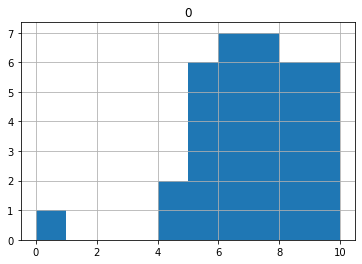

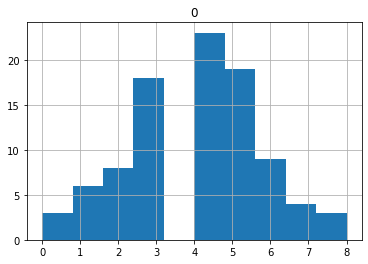

In [173]:
pd.DataFrame(data_1).hist(bins=10)
pd.DataFrame(data_2).hist(bins=10)

H0 - данные принадлежат одному множеству, H1 - данные принадлежат разным множествам

In [174]:
alpha = 0.05
t, p = st.ttest_ind(data_1, data_2, equal_var=False)
print(t, p)
if (result.pvalue < alpha):
    print('Отвергаем нулевую гипотезу, данные принадлежат разным множествам')
else:
    print('Не отвергаем нулевую гипотезу')

7.068404675178226 2.4974180382616264e-09
Отвергаем нулевую гипотезу, данные принадлежат разным множествам


Даже при уровне значимости в 0.001%, мы можем отвергнуть нулевую гипотезу и утверждать, что данные не принадлежать одному множеству.

<div class="alert alert-info">
<b>Задание № 7 (задание без подвоха)</b>

На примере датасета про жилье в New York City, мы сталкивались с примером, когда переменная имеет не совсем нормальное распределение. 

- Предположим, Вы сформировали две гипотезы:
    - нулевая гипотеза - распределение нормальное;
    - альтернативная гипотеза - распределение ненормальное.
- допустим, вы применили какой-то тест (сейчас неважно какой), который показал уровень значимости  `p-value = 0.03`. Каковы будут ваши выводы? Будем считать что у нас нормальное распределение или все-таки нет?)
    
</div>

Все будет зависеть от того какой мы определим пороговый уровень статистической значимости. Если alpha 0.05, то мы сможем отвергнуть нулевую гипотезу о том, что распределение нормальное. Если, например, 0.01, то не сможем отвергнуть нулевую гипотезу.

<div class="alert alert-info">
<b>Задание № 8</b>
    
Первая выборка — это пациенты, которых лечили препаратом `А`.  Вторая выборка — пациенты, которых лечили препаратом `B`.

Значения в выборках — это некоторая характеристика эффективности лечения (уровень метаболита в крови, температура через три дня после начала лечения, срок выздоровления, число койко-дней, и т.д.) 

- Требуется выяснить, имеется ли значимое различие эффективности препаратов `А` и `B`, или различия являются чисто случайными и объясняются «естественной» дисперсией выбранной характеристики?  (`уровень значимости принять за 0.05 (5%)`)

- При каком минимальном p-value различия были бы уже значимы? 
    
- Если выборки незначительно отличаются, то продемонстрируйте это визуально
</div>

In [175]:
np.random.seed(11)
A = st.norm.rvs(scale=15,loc=169,size=300)
B = st.norm.rvs(scale=14,loc=171.4,size=300)

### Ваш код:
# Подсказка, обратите внимание на Two-sample T-test

H0 - значимых различий эффективности препаратов А и В нет, H1 - существуют значимые различия в действии препаратов

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

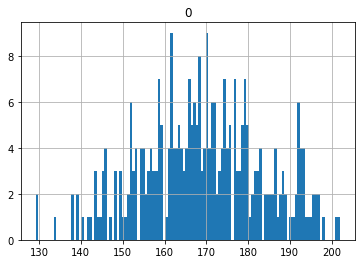

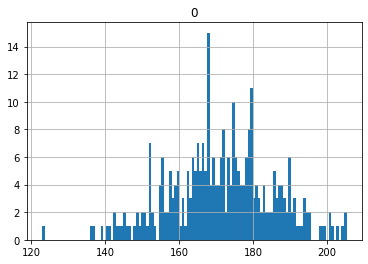

In [176]:
pd.DataFrame(A).hist(bins=120)
pd.DataFrame(B).hist(bins=120)

In [178]:
# Two-sample T-test
alpha= 0.05
result = st.ttest_rel(A,B)
print(result)
if (result.pvalue < alpha):
    print('Отвергаем нулевую гипотезу, есть различия в эффективности действия препаратов')
else:
    print('Не отвергаем нулевую гипотезу')

Ttest_relResult(statistic=-2.0349336314319992, pvalue=0.042739435733033855)
Отвергаем нулевую гипотезу, есть различия в эффективности действия препаратов


Если бы мы установили пороговый уровень статистической значимости равный 0,02, то тогда бы мы не смогли отвергнуть нулевую гипотезу

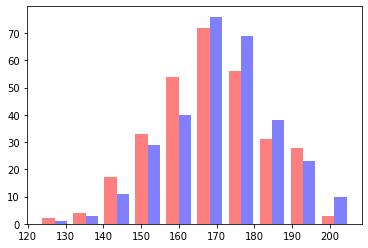

In [179]:
plt.hist([A, B], color=['r','b'], alpha=0.5)
plt.show()